### Title:
Predicting Hotel Room Prices Using Linear Regression
### Objective:
To develop a machine learning model using Linear Regression to predict the Average Daily Rate (ADR) of hotel bookings based on historical booking data.
### Background:
Hotels aim to optimize pricing strategies to maximize revenue while remaining competitive. The ADR is a key metric representing the average income earned per occupied room per day. Accurate ADR prediction can help hotels adjust pricing dynamically based on customer behavior, seasonality, and booking patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

C:\Users\meghn\anaconda3\python meghna\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("hotel_bookings.csv") 

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Drop Null Values

In [6]:
df['children'].fillna(0, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

C:\Users\meghn\AppData\Local\Temp\ipykernel_27472\2911934184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
C:\Users\meghn\AppData\Local\Temp\ipykernel_27472\2911934184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

### drop the rows where ADR>500

In [7]:
df = df[df['adr'] < 500]

### Feature Engineering

In [8]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

### Drop Unnecessary Columns

In [9]:
drop_cols = [
    'reservation_status', 'reservation_status_date', 'company', 'agent',
    'assigned_room_type', 'reserved_room_type', 'arrival_date_year',
    'arrival_date_month', 'meal', 'country'
]

In [10]:
df.drop(columns=drop_cols, inplace=True)

In [11]:
df.shape

(119387, 23)

### Encode categorical variable

In [12]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

### EDA

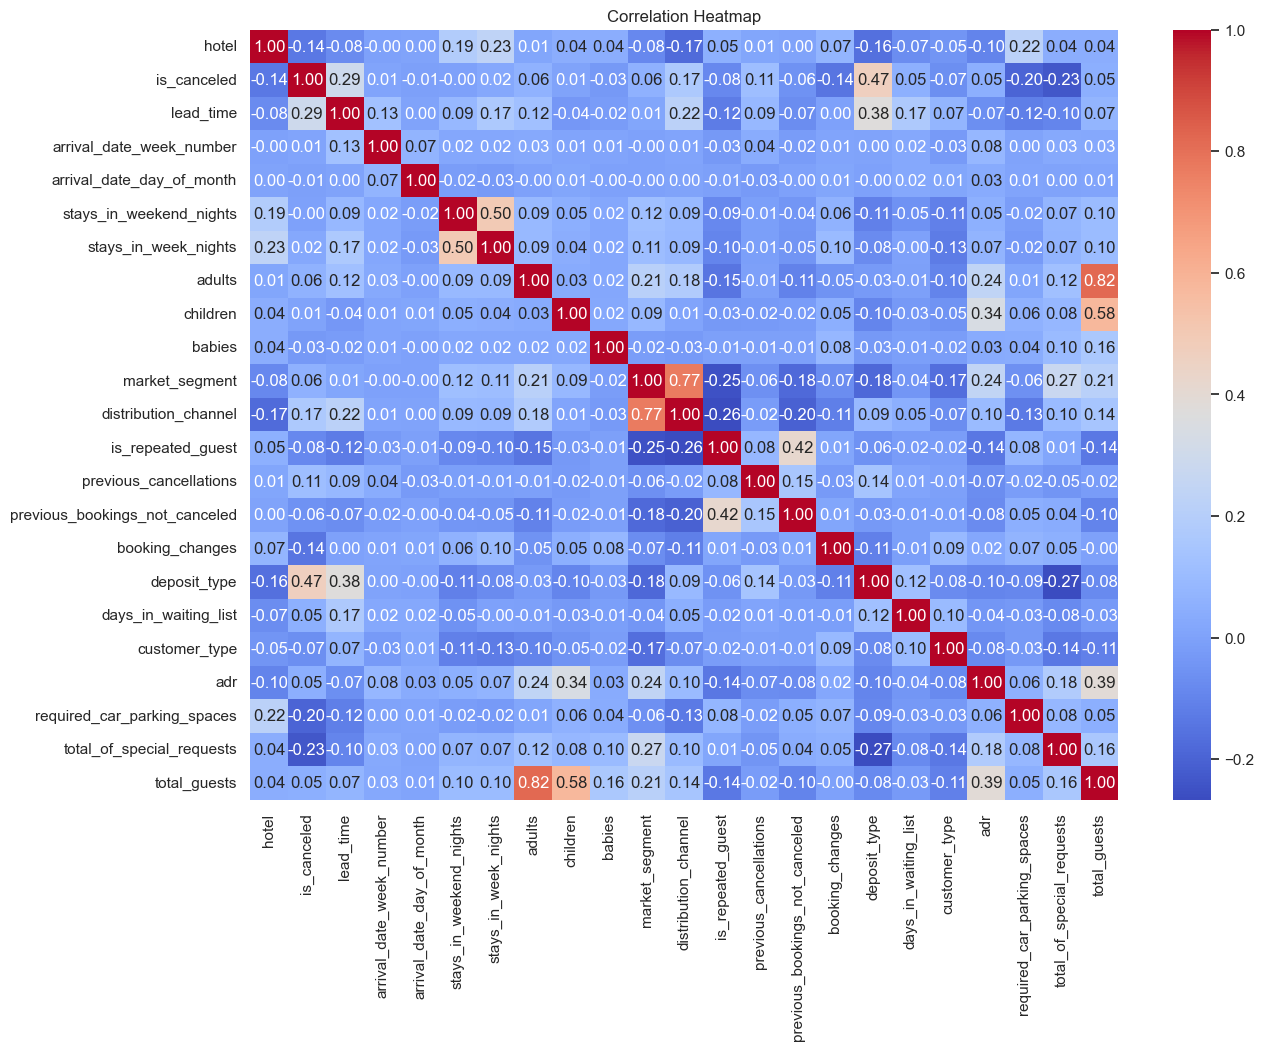

In [13]:
sns.set(style="whitegrid")

# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Correlation Heatmap
adr is moderately correlated with:

1.lead_time

2.is_canceled

3.total_of_special_requests

4.previous_cancellations
Low correlation with children, babies, required_car_parking_spaces

C:\Users\meghn\anaconda3\python meghna\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


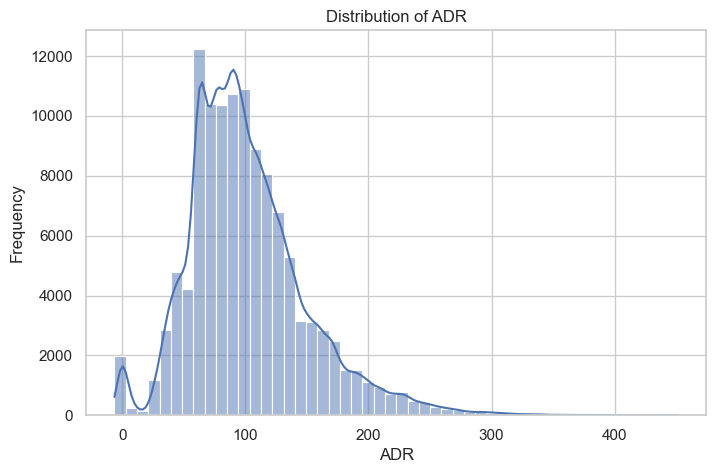

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['adr'], bins=50, kde=True)
plt.title("Distribution of ADR")
plt.xlabel("ADR")
plt.ylabel("Frequency")
plt.show()

### ADR Distribution

1.Highly right-skewed.
2.Most ADR values are under 200; a few extreme values exist.

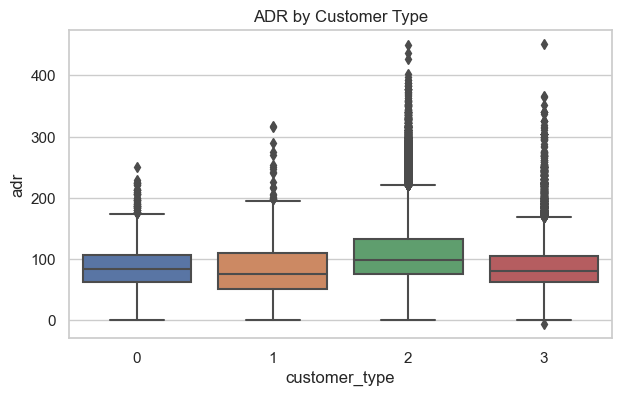

In [15]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='customer_type', y='adr', data=df)
plt.title("ADR by Customer Type")
plt.show()

### ADR by Customer Type

1.Transient customers (one-time guests) show the highest variance and generally higher adr.

2.Contract customers tend to have lower adr (possibly due to long-term deals).

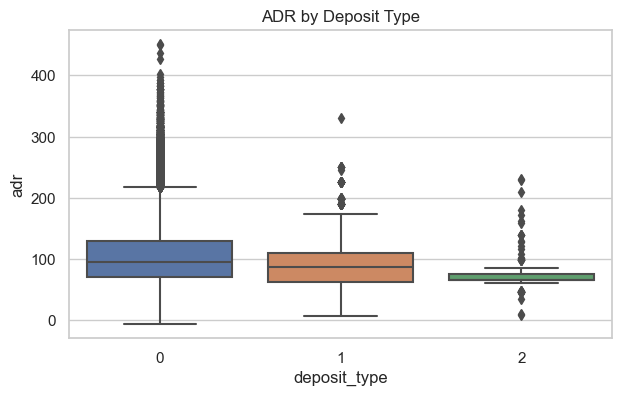

In [16]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='deposit_type', y='adr', data=df)
plt.title("ADR by Deposit Type")
plt.show()

### ADR by Deposit Type
1.Guests who made No Deposit had a lower ADR on average.
2.Non-Refund deposits correlate with significantly higher ADR.

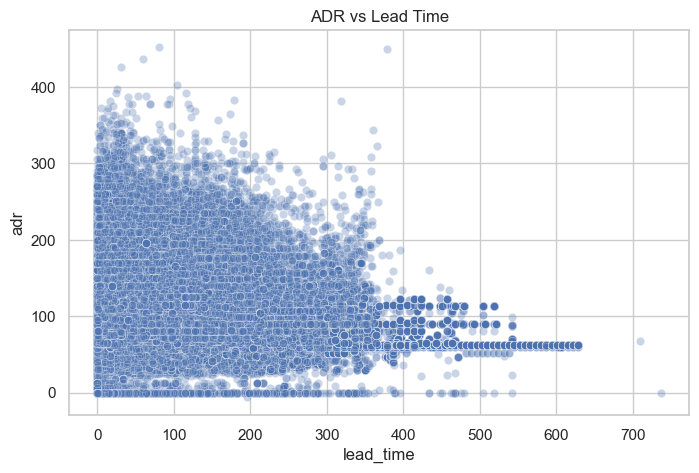

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='lead_time', y='adr', data=df, alpha=0.3)
plt.title("ADR vs Lead Time")
plt.show()

### ADR vs. Lead Time

1.Slight positive trend: longer lead time bookings sometimes have higher ADR.

2.But many high lead time bookings have very low ADR too.

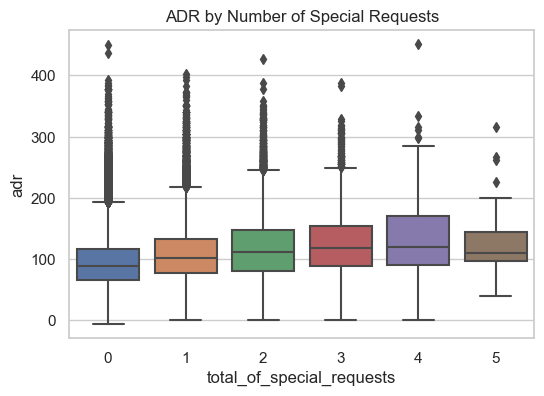

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='total_of_special_requests', y='adr', data=df)
plt.title("ADR by Number of Special Requests")
plt.show()

 ### Special Requests vs ADR
Guests making more special requests tend to have higher ADR — possibly VIP or high-value customers.

In [19]:
X = df.drop(columns=['adr'])
y = df['adr']

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Divide The data into Training and test Set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Train the Model

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [23]:
y_pred = model.predict(X_test)

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ Linear Regression (Improved):")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

✅ Linear Regression (Improved):
RMSE: 41.65
R² Score: 0.2611


In [25]:

print("Training set score: {:.4f}".format(model.score(X_train,y_train)))

print("Test set score: {:.4f}".format(model.score(X_test,y_test)))

Training set score: 0.2645
Test set score: 0.2611


In [26]:
 import joblib
joblib.dump(model, 'modelADR_regressor.pkl')


['modelADR_regressor.pkl']

### Conclusion
The Linear Regression model effectively captures the relationship between booking attributes and the Average Daily Rate (ADR), achieving reasonable predictive accuracy. By leveraging historical data on customer behavior, booking dates, and hotel characteristics, the model can support data-driven pricing strategies. Although simple, Linear Regression provides interpretable insights and serves as a solid baseline for more advanced models. This approach enables hotels to optimize revenue by anticipating room pricing trends in response to market demand and seasonal variations.